In [1]:
import pandas as pd
import nltk
from libs.cleaning import *
from libs.preprocess import *
from matplotlib import pyplot as plt
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

nltk_download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Lectura

In [2]:
DATA_PATH = "../data"
dfs = list()
for raiz, directorios, archivos in os.walk(DATA_PATH):
    for archivo in archivos:
        dfs.append(pd.read_excel(os.path.join(raiz, archivo).replace("\\", "/"), header=None))
tweets = pd.concat(dfs, ignore_index=True)
tweets.columns = ['User', 'Tweet', 'Link', 'Date']
tweets.head()


,User,Tweet,Link,Date
0,@jggonzalez001,"RT @IFT_MX: El Comisionado del @IFT_MX, @juare...",https://twitter.com/jggonzalez001/status/15898...,"November 07, 2022 at 08:44PM"
1,@AndreaViloria23,@Juan_OrtizMX @cofecemx @IFT_MX También los de...,https://twitter.com/AndreaViloria23/status/158...,"November 07, 2022 at 08:52PM"
2,@AlexisCam3,RT @Juan_OrtizMX: 2do riesgo: Retrasar la elec...,https://twitter.com/AlexisCam3/status/15898139...,"November 07, 2022 at 08:56PM"
3,@MrHiroRs,@3dermoas @yomobilemx Por 2 desde el día viern...,https://twitter.com/MrHiroRs/status/1589815959...,"November 07, 2022 at 09:03PM"
4,@Eibarra_S,RT @IleanaGamaB: Gracias por la invitación @ro...,https://twitter.com/Eibarra_S/status/158981652...,"November 07, 2022 at 09:06PM"


# Limpieza

In [3]:
tweets["RT"] = tweets["Tweet"].apply(lambda x: 1 if x.startswith("RT") else 0)
tweets.head()

,User,Tweet,Link,Date,RT
0,@jggonzalez001,"RT @IFT_MX: El Comisionado del @IFT_MX, @juare...",https://twitter.com/jggonzalez001/status/15898...,"November 07, 2022 at 08:44PM",1
1,@AndreaViloria23,@Juan_OrtizMX @cofecemx @IFT_MX También los de...,https://twitter.com/AndreaViloria23/status/158...,"November 07, 2022 at 08:52PM",0
2,@AlexisCam3,RT @Juan_OrtizMX: 2do riesgo: Retrasar la elec...,https://twitter.com/AlexisCam3/status/15898139...,"November 07, 2022 at 08:56PM",1
3,@MrHiroRs,@3dermoas @yomobilemx Por 2 desde el día viern...,https://twitter.com/MrHiroRs/status/1589815959...,"November 07, 2022 at 09:03PM",0
4,@Eibarra_S,RT @IleanaGamaB: Gracias por la invitación @ro...,https://twitter.com/Eibarra_S/status/158981652...,"November 07, 2022 at 09:06PM",1


In [4]:
tweets["Cleaned"] = limpieza_total(tweets["Tweet"], del_stopwords=["sin","no", "ningun", "ni", "nada", "nadie"])
tweets["Cleaned"] = tweets["Cleaned"].apply(lambda x: lemmatize_text(x))

In [5]:
tweets["len"] = tweets["Cleaned"].apply(lambda x: len(x.split()))

In [6]:
tweets[tweets["RT"]==0][tweets["Cleaned"]==""]

,User,Tweet,Link,Date,RT,Cleaned,len
62,@Musicmanhunter,@TELMEXSoluciona @Telmex @Profeco @IFT_MX,https://twitter.com/Musicmanhunter/status/1590...,"November 08, 2022 at 10:30AM",0,,0
133,@WilliamsJL18,@IFT_MX @Unefon @Profeco Gracias,https://twitter.com/WilliamsJL18/status/159013...,"November 08, 2022 at 05:52PM",0,,0
147,@VictorGZepeda1,@IFT_MX @ATTMx @Telcel @MovistarMX Gracias,https://twitter.com/VictorGZepeda1/status/1590...,"November 08, 2022 at 07:26PM",0,,0
260,@LuisAndrexo,@IFT_MX @yomobilemx @Profeco Gracias,https://twitter.com/LuisAndrexo/status/1590394...,"November 09, 2022 at 11:20AM",0,,0
321,@PIOrealtor,@IFT_MX @AtencionProfeco @ATTMxAyuda Gracias!,https://twitter.com/PIOrealtor/status/15904550...,"November 09, 2022 at 03:23PM",0,,0
...,...,...,...,...,...,...,...
118526,@LuisAndrexo,O con el @IFT_MX ?,https://twitter.com/LuisAndrexo/status/1589649...,"November 07, 2022 at 10:01AM",0,,0
118560,@criminofonia,@IFT_MX Gracias !!,https://twitter.com/criminofonia/status/158968...,"November 07, 2022 at 12:17PM",0,,0
118607,@ergioari,@Profeco\n@IFT_MX\n@cofetel\n@quejascofetel,https://twitter.com/ergioari/status/1589743325...,"November 07, 2022 at 04:15PM",0,,0
118632,@PedroZam1996,@Profeco @IFT_MX,https://twitter.com/PedroZam1996/status/158977...,"November 07, 2022 at 06:33PM",0,,0


# Análisis

In [7]:
print("Total de tweets: {:,}".format(len(tweets)))
print("Total de RTs: {:,}".format(tweets["RT"].sum()))
print("Porcentaje de RTs: {:.2f}%".format(tweets["RT"].mean()*100))

Total de tweets: 118,661
Total de RTs: 54,151
Porcentaje de RTs: 45.64%


In [8]:
# Top 20 palabras más comunes
top_words = pd.Series(count_words(tweets.Cleaned.str.split())).sort_values(ascending=False)
top_words_nort = pd.Series(count_words(tweets[tweets.RT != 1].Cleaned.str.split())).sort_values(ascending=False)

top_words_per = top_words / top_words.sum()
top_words_nort_per = top_words_nort / top_words_nort.sum()

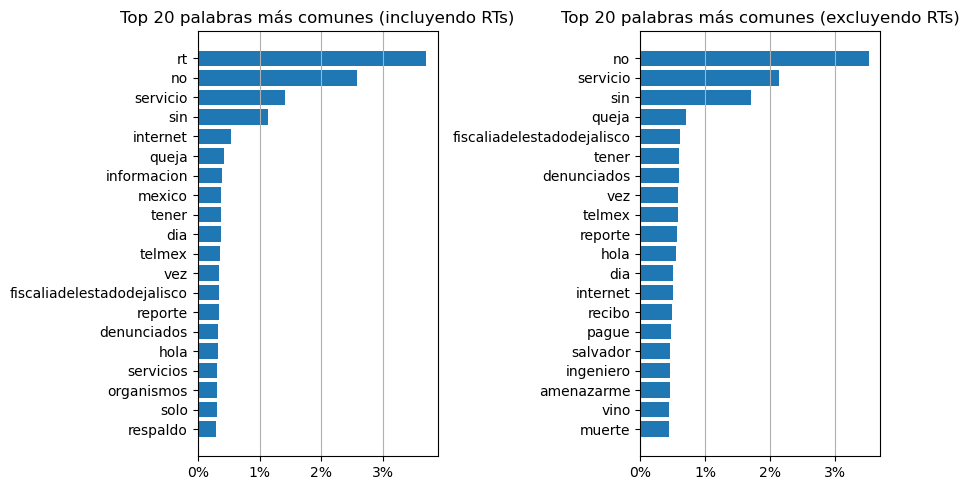

In [9]:
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores como porcentaje
formatter = FuncFormatter(lambda x, pos: f'{x:.0%}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la primera gráfica
axes[0].barh(top_words_per.index[:20], top_words_per.values[:20])
axes[0].set_title("Top 20 palabras más comunes (incluyendo RTs)")
axes[0].invert_yaxis()  # Voltear en espejo
axes[0].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

axes[1].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la segunda gráfica
axes[1].barh(top_words_nort_per.index[:20][::-1], top_words_nort_per.values[:20][::-1])
axes[1].set_title("Top 20 palabras más comunes (excluyendo RTs)")
axes[1].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

plt.tight_layout()
plt.show()

In [10]:
tweets = tweets[tweets["RT"] == 0][tweets["Cleaned"]!=""][tweets["len"]>=3].sample(frac=0.25, random_state=42)

In [11]:
len(tweets)

14664

# Clustering

## Tokenize

In [12]:
tweets["Token"] = tweets.Cleaned.str.split()
tweets.head()

,User,Tweet,Link,Date,RT,Cleaned,len,Token
17850,@IFT_MX,¿Qué herramientas tienen los países de la @OEA...,https://twitter.com/IFT_MX/status/166730708259...,"June 09, 2023 at 05:06PM",0,herramientas paises incrementar calidad regula...,12,"[herramientas, paises, incrementar, calidad, r..."
11691,@rodlevario,@MiMovistarMex kienme respondera por un ekipo ...,https://twitter.com/rodlevario/status/16595653...,"May 19, 2023 at 08:23AM",0,kienme respondera ekipo ke ctnompre app no res...,13,"[kienme, respondera, ekipo, ke, ctnompre, app,..."
102697,@OrgulloPunk,Oigan @Cinepolis @AyudaCinepolis les valió ver...,https://twitter.com/OrgulloPunk/status/1804293...,"June 21, 2024 at 05:22PM",0,oigan valio verga verdad dio telefono ni siqui...,18,"[oigan, valio, verga, verdad, dio, telefono, n..."
73013,@Fer_Borjon,"@gomezjl @IFT_MX @dpl_news Así es, la #discrec...",https://twitter.com/Fer_Borjon/status/17534761...,"February 02, 2024 at 11:51AM",0,discrecionalidad opuesto derecho enfatizo t mec,6,"[discrecionalidad, opuesto, derecho, enfatizo,..."
30894,@AtencionProfeco,@omar_gguillen @TELMEXSoluciona @carlosslim @a...,https://twitter.com/AtencionProfeco/status/169...,"August 30, 2023 at 12:24PM",0,estimado consumidor negativa proveedor brindar...,15,"[estimado, consumidor, negativa, proveedor, br..."


## Embeddings

In [13]:
from gensim.models import FastText
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# w2v = FastText(sentences=tweets.Token, vector_size=100, window=3, min_count=1, workers=-1)
w2v = Word2Vec(sentences=tweets.Token, vector_size=100, window=3, min_count=1, workers=-1)
# w2v = TfidfVectorizer()
# emb = list(w2v.fit_transform(tweets.Cleaned).toarray())

In [15]:
tweets["Embedding"] = tweets.Token\
    .apply(lambda x: [w2v.wv[word] for word in x if word in w2v.wv.key_to_index])\
    .apply(lambda x: np.zeros(w2v.vector_size) if len(x) == 0 else np.mean(x, axis=0))
# tweets["Embedding"] = emb

In [16]:
tweets.head()

,User,Tweet,Link,Date,RT,Cleaned,len,Token,Embedding
17850,@IFT_MX,¿Qué herramientas tienen los países de la @OEA...,https://twitter.com/IFT_MX/status/166730708259...,"June 09, 2023 at 05:06PM",0,herramientas paises incrementar calidad regula...,12,"[herramientas, paises, incrementar, calidad, r...","[0.0017891178, 0.0012835743, 0.00053875794, -0..."
11691,@rodlevario,@MiMovistarMex kienme respondera por un ekipo ...,https://twitter.com/rodlevario/status/16595653...,"May 19, 2023 at 08:23AM",0,kienme respondera ekipo ke ctnompre app no res...,13,"[kienme, respondera, ekipo, ke, ctnompre, app,...","[0.0025265939, -0.00078352424, -0.00220305, 0...."
102697,@OrgulloPunk,Oigan @Cinepolis @AyudaCinepolis les valió ver...,https://twitter.com/OrgulloPunk/status/1804293...,"June 21, 2024 at 05:22PM",0,oigan valio verga verdad dio telefono ni siqui...,18,"[oigan, valio, verga, verdad, dio, telefono, n...","[0.0016695269, -0.00069429434, 0.0033791906, -..."
73013,@Fer_Borjon,"@gomezjl @IFT_MX @dpl_news Así es, la #discrec...",https://twitter.com/Fer_Borjon/status/17534761...,"February 02, 2024 at 11:51AM",0,discrecionalidad opuesto derecho enfatizo t mec,6,"[discrecionalidad, opuesto, derecho, enfatizo,...","[0.0031149145, -0.00030412013, -0.0026576223, ..."
30894,@AtencionProfeco,@omar_gguillen @TELMEXSoluciona @carlosslim @a...,https://twitter.com/AtencionProfeco/status/169...,"August 30, 2023 at 12:24PM",0,estimado consumidor negativa proveedor brindar...,15,"[estimado, consumidor, negativa, proveedor, br...","[0.0004964544, -0.0008595359, 0.001155174, -0...."


## T-SNE
(Para pre visualizar los datos)

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2, random_state=42,
             n_iter=1000, perplexity=5, init='pca',
               metric='cosine', n_jobs=-1)
embeddings = np.vstack(tweets.Embedding.to_numpy())
tsne_cord = tsne.fit_transform(embeddings)

In [19]:
tweets["TSNE"] = tsne_cord.tolist()
tweets.head()

,User,Tweet,Link,Date,RT,Cleaned,len,Token,Embedding,TSNE
17850,@IFT_MX,¿Qué herramientas tienen los países de la @OEA...,https://twitter.com/IFT_MX/status/166730708259...,"June 09, 2023 at 05:06PM",0,herramientas paises incrementar calidad regula...,12,"[herramientas, paises, incrementar, calidad, r...","[0.0017891178, 0.0012835743, 0.00053875794, -0...","[49.953548431396484, -7.766390800476074]"
11691,@rodlevario,@MiMovistarMex kienme respondera por un ekipo ...,https://twitter.com/rodlevario/status/16595653...,"May 19, 2023 at 08:23AM",0,kienme respondera ekipo ke ctnompre app no res...,13,"[kienme, respondera, ekipo, ke, ctnompre, app,...","[0.0025265939, -0.00078352424, -0.00220305, 0....","[24.477581024169922, 74.34393310546875]"
102697,@OrgulloPunk,Oigan @Cinepolis @AyudaCinepolis les valió ver...,https://twitter.com/OrgulloPunk/status/1804293...,"June 21, 2024 at 05:22PM",0,oigan valio verga verdad dio telefono ni siqui...,18,"[oigan, valio, verga, verdad, dio, telefono, n...","[0.0016695269, -0.00069429434, 0.0033791906, -...","[46.47538375854492, 62.68722915649414]"
73013,@Fer_Borjon,"@gomezjl @IFT_MX @dpl_news Así es, la #discrec...",https://twitter.com/Fer_Borjon/status/17534761...,"February 02, 2024 at 11:51AM",0,discrecionalidad opuesto derecho enfatizo t mec,6,"[discrecionalidad, opuesto, derecho, enfatizo,...","[0.0031149145, -0.00030412013, -0.0026576223, ...","[25.292654037475586, 23.064451217651367]"
30894,@AtencionProfeco,@omar_gguillen @TELMEXSoluciona @carlosslim @a...,https://twitter.com/AtencionProfeco/status/169...,"August 30, 2023 at 12:24PM",0,estimado consumidor negativa proveedor brindar...,15,"[estimado, consumidor, negativa, proveedor, br...","[0.0004964544, -0.0008595359, 0.001155174, -0....","[-117.49856567382812, -24.610754013061523]"


## Pre visualización

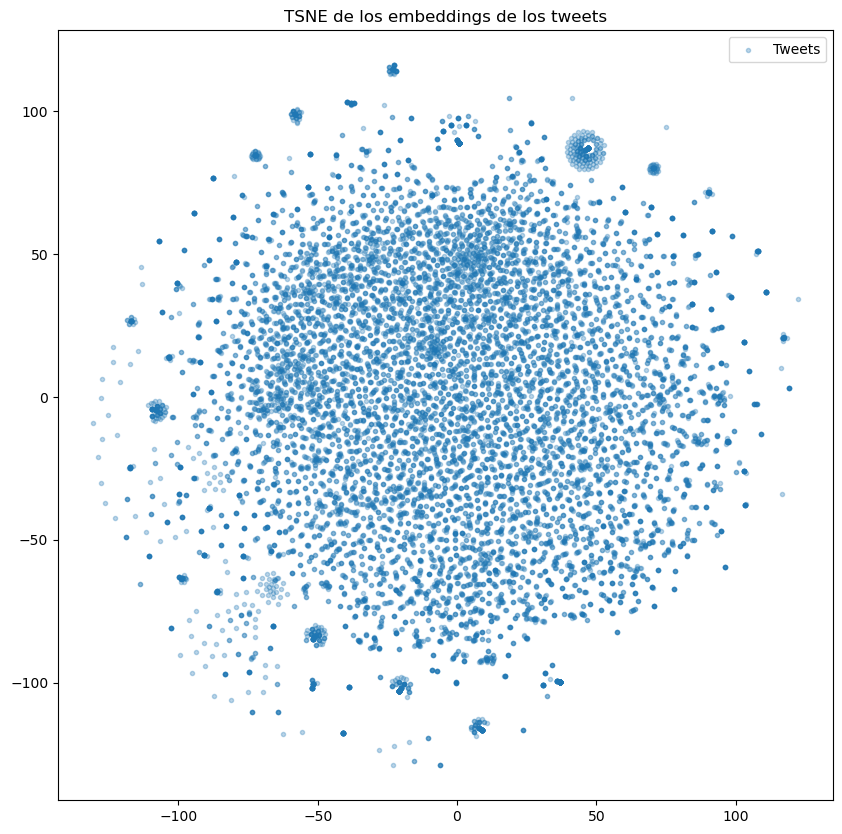

In [20]:
def plot_tsne(tweets):
    pre_vis = np.vstack(tweets[tweets["RT"]==0].TSNE.apply(lambda x: np.array(x)).to_numpy())
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(pre_vis[:, 0], pre_vis[:, 1], alpha=0.3, marker='.', label='Tweets')
    plt.title("TSNE de los embeddings de los tweets")
    # plt.xlim(-15, 15)
    # plt.ylim(-15, 15)
    plt.legend()
    plt.show()

plot_tsne(tweets)

## KMeans

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
#Distancia Coseno (1- similitud)
dist_cos = 1 - cosine_similarity(embeddings)

In [23]:
def cluster_kmeans(data, n_clusters, random_state=42, max_iter=500):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, max_iter=max_iter)
    return kmeans, kmeans.fit_predict(data)

def elbow_method(data, max_k=10):
    distortions = []
    for i in range(1, max_k+1):
        kmeans, _ = cluster_kmeans(data, i)
        distortions.append(kmeans.inertia_)
    return distortions

def print_elbow(distortions):
    plt.plot(range(1, len(distortions)+1), distortions, marker='o')
    plt.title("Método del codo")
    plt.xlabel("Número de clusters")
    plt.ylabel("Distorsión")
    plt.show()


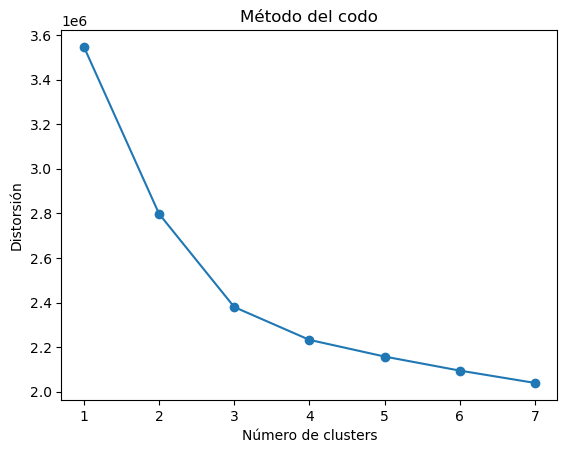

In [24]:
print_elbow(elbow_method(dist_cos, 7))

In [28]:
model_clust, cluster = cluster_kmeans(dist_cos, 3)
tweets["Cluster"] = cluster

## Visualización

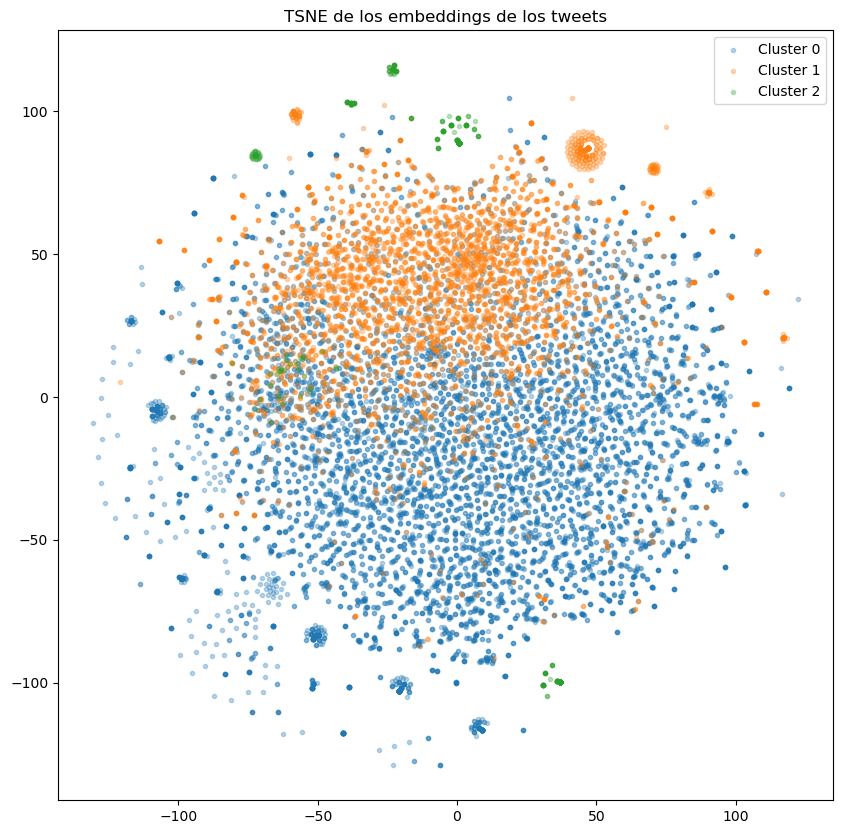

In [29]:
def plot_tsne_clusters(tweets):
    fig = plt.figure(figsize=(10, 10))
    for i in list(set(tweets.Cluster.values.tolist())):
        pre_vis = np.vstack(tweets[tweets["Cluster"]==i].TSNE.apply(lambda x: np.array(x)).to_numpy())
        plt.scatter(pre_vis[:, 0], pre_vis[:, 1], alpha=0.3, marker='.', label=f'Cluster {i}')
    plt.title("TSNE de los embeddings de los tweets")
    # plt.xlim(-15, 15)
    # plt.ylim(-15, 15)
    plt.legend()
    plt.show()

plot_tsne_clusters(tweets)

In [27]:
tweets[tweets["Cluster"]==2].Cleaned.values.tolist()[:10]

['cobrando lineas no mias no quieren generar cancelacion cobros intervencion favor',
 'oficio telmex hacerse pendejos no entienden pasarse listos no hacen carta baja deben no puedo portabilidad megacable me declinado no hacen cosas deben denunciados fiscaliadelestadodejalisco',
 'mentira ultimo me batallado demasiado servicio nadie atiende ni da solucion cobraron servicio adelantado no brindando estafa',
 'vez piden haga recarga aseguran linea bien no confio hice recargas no servicio no dicen poner recargas linea',
 'espero no borrado nuevamente falla gral no solo',
 'oficio telmex hacerse pendejos no entienden pasarse listos no hacen carta baja deben no puedo portabilidad megacable me declinado no hacen cosas deben denunciados fiscaliadelestadodejalisco',
 'aunque cancelacion servicio llevo lunes marzo telmex quiere cobrame aun cuenta no nada servicio absoluto ano jamas hicieron nada ello necesito ayuda no pagarles',
 'favor no supieramos sistema gubernamental suena pasara dice no abr

In [33]:
dist_cos[0]

array([-2.3841858e-07,  8.2687390e-01,  9.9623847e-01, ...,
        1.0033045e+00,  1.1566895e+00,  9.7143507e-01], dtype=float32)